In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!ls ../input/ubiquant-market-prediction

example_sample_submission.csv  example_test.csv  train.csv  ubiquant


In [3]:
!ls ../input/ump-dataset

train.parquet


***
## target analysis

In [4]:
train = pd.read_parquet("../input/ump-dataset/train.parquet")
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3141410 entries, 0 to 3141409
Columns: 304 entries, row_id to f_299
dtypes: float32(301), int16(2), object(1)
memory usage: 3.6+ GB


In [5]:
train.target.nunique()

3066513

In [6]:
train.target.describe(percentiles=np.arange(0.1,1.0,0.1))

count    3.141410e+06
mean    -2.109159e-02
std      9.176629e-01
min     -9.419646e+00
10%     -9.353218e-01
20%     -6.089074e-01
30%     -4.078313e-01
40%     -2.474232e-01
50%     -9.717009e-02
60%      5.539829e-02
70%      2.411850e-01
80%      5.008606e-01
90%      9.782519e-01
max      1.203861e+01
Name: target, dtype: float64

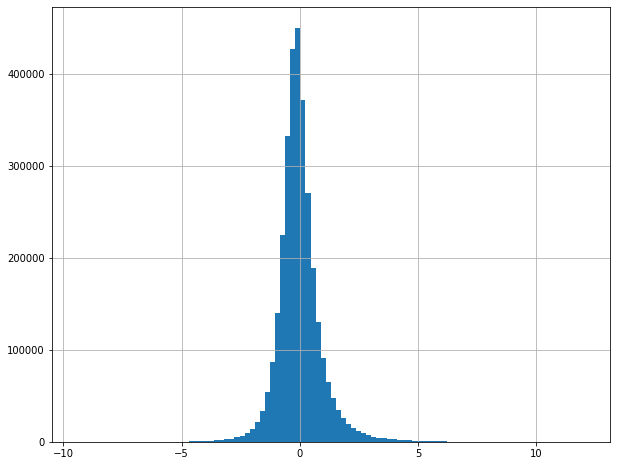

In [7]:
plt.figure(figsize=(10,8))
plt.hist(train.target, bins=100);
plt.grid()
plt.show()

In [8]:
train.time_id.nunique()

1211

In [9]:
feats = [col for col in train.columns if "f_" in col]
len(feats)

300

In [10]:
r = train[feats].nunique(axis=0)
r.sort_values()

f_62     1556838
f_142    1562321
f_153    1573610
f_229    1585060
f_108    1590892
          ...   
f_201    3080210
f_127    3080593
f_11     3081426
f_19     3081954
f_126    3082479
Length: 300, dtype: int64

***
## Investment & Time ids

In [11]:
train.time_id.nunique()

1211

In [12]:
train.investment_id.nunique()

3579

In [13]:
# time-observations by investment_id
result1 = train.groupby("investment_id")["time_id"].count()
result1.sort_values()

investment_id
1415       2
2800       3
3662       7
85         8
2558       8
        ... 
2727    1209
1062    1209
2385    1209
1144    1209
2140    1211
Name: time_id, Length: 3579, dtype: int64

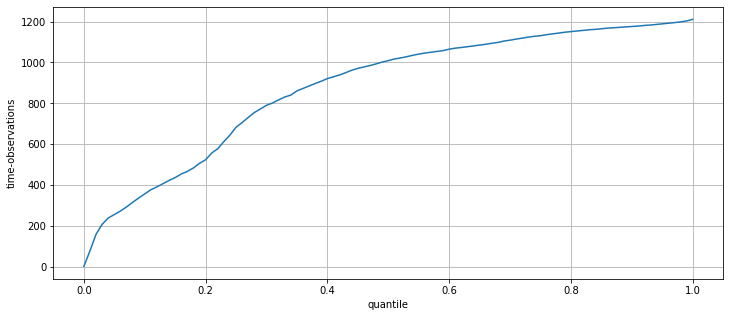

In [14]:
plt.figure(figsize=(12,5))
result1.quantile(np.arange(0.0,1.01,0.01)).plot()
plt.grid()
plt.xlabel("quantile")
plt.ylabel("time-observations")
plt.show()

In [15]:
# investment-observations by time_id
result2 = train.groupby("time_id")["investment_id"].count()
result2

time_id
0       2272
1       2275
2       2275
3       2285
4       2273
        ... 
1215    3432
1216    3418
1217    3420
1218    3432
1219    3438
Name: investment_id, Length: 1211, dtype: int64

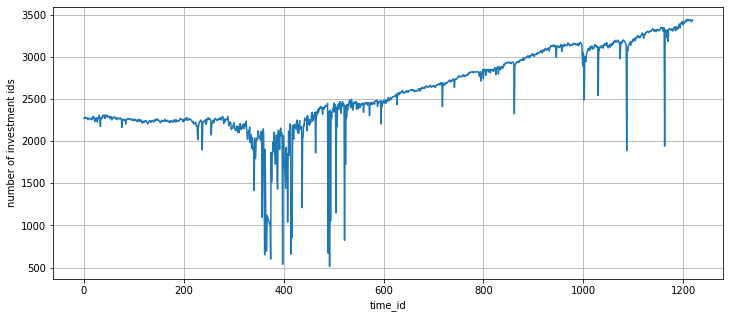

In [16]:
plt.figure(figsize=(12,5))
plt.plot(result2.index, result2.values)
plt.grid()
plt.xlabel("time_id")
plt.ylabel("number of investment ids")
plt.show()

***
## Target-Feats correlation

***